## Assignment Lending Club Case Study
#### Check Point 1: Import All libraries and set Session Variables 

In [1]:
import ast,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

#### Load the Loan.csv Data file in Pandas

In [2]:
#importing data dictionary
global dd
dd = pd.read_excel(r'C:\\Users\\Prashant\\Documents\\iiitb\\Lending-Club-Case-Study\\Data_Dictionary.xlsx')
dd = dd.T
dd.columns = dd.iloc[0]
dd = dd.drop(dd.index[0])
dd

#load loan data in loan dataframe
loan = pd.read_csv('C:\\Users\\Prashant\\Documents\\iiitb\\Lending-Club-Case-Study\\loan.csv', delimiter = ",", 
                   header=0, encoding = "ISO-8859-1", low_memory=False,skipinitialspace=True)


#### Cleanup the code, for below points
   ##### Drop all columns with NA values
   ##### Drop all rows with NA or Null values for data consistancy
   ##### take the count of sum isnull.sum , must be 0 for all rows/cols left for analysis 
   ##### create subcolums for additional analysis 
   ##### drop all columns with only 1 unique values (values with no changes in cols ) 

#### Checkpoint 2 : Data Cleanup activities

In [3]:
#Cleaning DATA

#For calculation remove the months text from term , remove special characters from other fields
loan["term"] = loan["term"].apply(lambda x : int(x.replace("months", "")))
loan["int_rate"] = loan["int_rate"].apply(lambda x : str(x).replace("%", ""))
loan.emp_length.replace({r'[^0-9]+':''}, regex=True, inplace=True);
# creat new joint columns for grade+subgrade for plotting
loan['loan_grade'] = loan.grade + loan.sub_grade
loan['income_bracket']=pd.cut(loan['annual_inc'],[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,1000000])

#remove empty rows
loan = loan[ loan["revol_util"].apply(lambda x: str(type(x))) == "<class 'str'>" ]
loan["revol_util"] = loan["revol_util"].apply(lambda x : str(x).replace("%", ""))

# Below columsn contan max null values, hebce useless for analysis ; dropping them from Data
loan.drop(columns=['mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc'], inplace = True)
loan.drop(columns=['mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl'], inplace = True)
loan.drop(columns=['num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts'], inplace = True)
loan.drop(columns=['num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m'], inplace = True)
loan.drop(columns=['pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort'], inplace = True)
loan.drop(columns=['total_bc_limit','total_il_high_credit_limit'], inplace = True)
loan.drop(columns=['mths_since_recent_bc_dlq','num_rev_tl_bal_gt_0'], inplace = True)
loan.drop(columns=['annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt'], inplace = True)
loan.drop(columns=['tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m'], inplace = True)
loan.drop(columns=['mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m'], inplace = True)
loan.drop(columns=['max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl'], inplace = True)
loan.drop(columns=['inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy'], inplace = True)
loan.drop(columns=['bc_util','mo_sin_old_il_acct','mths_since_last_major_derog'], inplace = True)
loan.drop(columns=['next_pymnt_d','mths_since_last_delinq','mths_since_last_record','desc','emp_title'],inplace = True)
loan.drop(columns=['zip_code','title','url','policy_code','application_type','pymnt_plan'],inplace = True)

# Below rows contain limited Null Values, dropping all Null rows from data
loan.dropna(subset=['pub_rec_bankruptcies'],inplace=True)
loan.dropna(subset=['tax_liens'],inplace=True)
loan.dropna(subset=['chargeoff_within_12_mths'],inplace=True)
loan.dropna(subset=['collections_12_mths_ex_med'],inplace=True)
loan.dropna(subset=['last_pymnt_d'],inplace=True)
loan.dropna(subset=['emp_length'],inplace=True)
loan.dropna(subset=['last_credit_pull_d'],inplace=True)
            
#dropping columns with just one unique value
loan = loan.drop(list(loan.nunique()[loan.nunique() == 1].index), axis=1)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_grade,income_bracket
0,1077501,1296599,5000,5000,"4,975.00",36,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,BB2,"(20000, 30000]"
1,1077430,1314167,2500,2500,"2,500.00",60,15.27,59.83,C,C4,1,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,CC4,"(20000, 30000]"
2,1077175,1313524,2400,2400,"2,400.00",36,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,CC5,"(10000, 20000]"
3,1076863,1277178,10000,10000,"10,000.00",36,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,CC1,"(40000, 50000]"
4,1075358,1311748,3000,3000,"3,000.00",60,12.69,67.79,B,B5,1,RENT,"80,000.00",Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00,BB5,"(70000, 80000]"


#### Check count of Null values , at this point its all cleaned data 

In [4]:
# create a copy of loan dataframe with only charged off loans data , this will be our NPA Loans copy  
## we are going to plot the charts for all loans + NPA loans seperatly for better comparison
df = pd.DataFrame.copy(loan)
df.head()
# extract the loans with charged-off status this will be master df
df = df.loc[df.loan_status == 'Charged Off']
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_grade,income_bracket
1,1077430,1314167,2500,2500,"2,500.00",60,15.27,59.83,C,C4,1,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,CC4,"(20000, 30000]"
8,1071795,1306957,5600,5600,"5,600.00",60,21.28,152.39,F,F2,4,OWN,"40,000.00",Source Verified,Dec-11,Charged Off,small_business,CA,5.55,0,Apr-04,2,11,0,5210,32.60,13,0.00,0.00,646.02,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12,0.00,FF2,"(30000, 40000]"
9,1071570,1306721,5375,5375,"5,350.00",60,12.69,121.45,B,B5,1,RENT,"15,000.00",Verified,Dec-11,Charged Off,other,TX,18.08,0,Sep-04,0,2,0,9279,36.50,3,0.00,0.00,"1,476.19","1,469.34",673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0.00,BB5,"(10000, 20000]"
12,1064687,1298717,9000,9000,"9,000.00",36,13.49,305.38,C,C1,1,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,debt_consolidation,VA,10.08,0,Apr-04,1,4,0,10452,91.70,9,0.00,0.00,"2,270.70","2,270.70","1,256.14",570.26,0.00,444.30,4.16,Jul-12,305.38,Nov-12,0.00,CC1,"(20000, 30000]"
14,1069057,1303503,10000,10000,"10,000.00",36,10.65,325.74,B,B2,3,RENT,"100,000.00",Source Verified,Dec-11,Charged Off,other,CA,7.06,0,May-91,2,14,0,11997,55.50,29,0.00,0.00,"7,471.99","7,471.99","5,433.47","1,393.42",0.00,645.10,6.31,Oct-13,325.74,Mar-14,0.00,BB2,"(90000, 100000]"


### Checkpoint 3 : PLot relationship of NPA loans with difrent variables

#### Checkpoint 3:1 npa_loans relation with home ownership/loan_status 

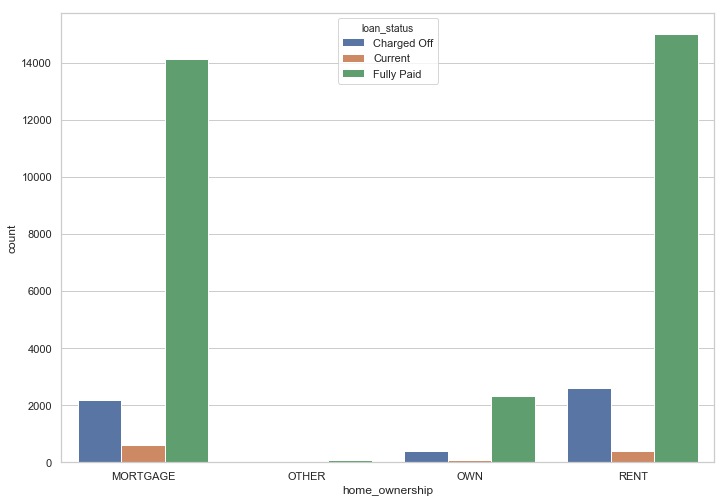

In [5]:
#npa_loans relation with home ownership/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
df1 = loan.groupby(['loan_status','home_ownership']).size().to_frame(name = 'count').reset_index()
ax = sns.barplot(x='home_ownership', y='count',hue='loan_status' , data=df1,orient='H')

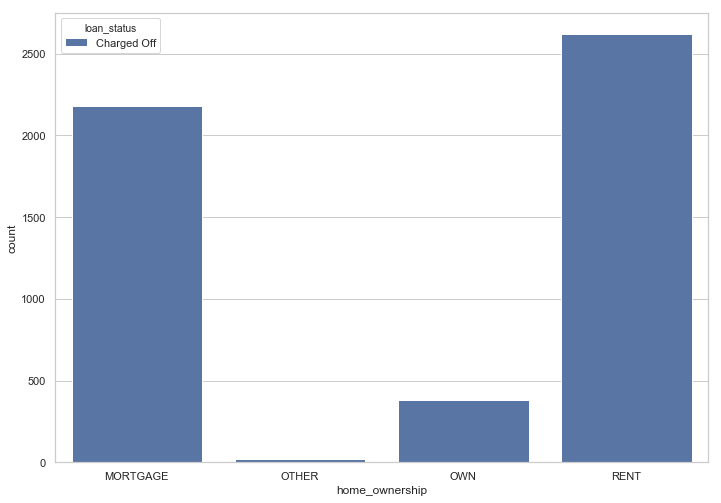

In [6]:
#npa_loans relation with home ownership/loan_status for only NPA loans
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
df1 = df.groupby(['loan_status','home_ownership']).size().to_frame(name = 'count').reset_index()
ax = sns.barplot(x='home_ownership', y='count',hue='loan_status' , data=df1,orient='H')


#### Home Ownership seems  correlation to NPS Defaults, Own homes Buyers have less defaults than Rental, or Mortagaged Home Buyers

#### Checkpoint 3:2 npa_loans relation with loan_grade/loan_status 

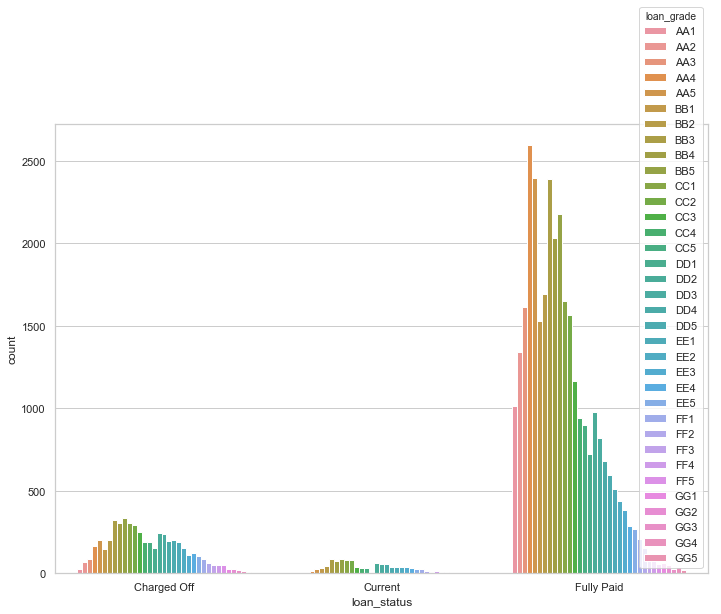

In [7]:
#npa_loans relation with loan_grade/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
df2 = loan.groupby(['loan_status','loan_grade']).size().to_frame(name = 'count').reset_index()
ax2 = sns.barplot(x='loan_status', y='count',hue='loan_grade' , data=df2,orient='H')

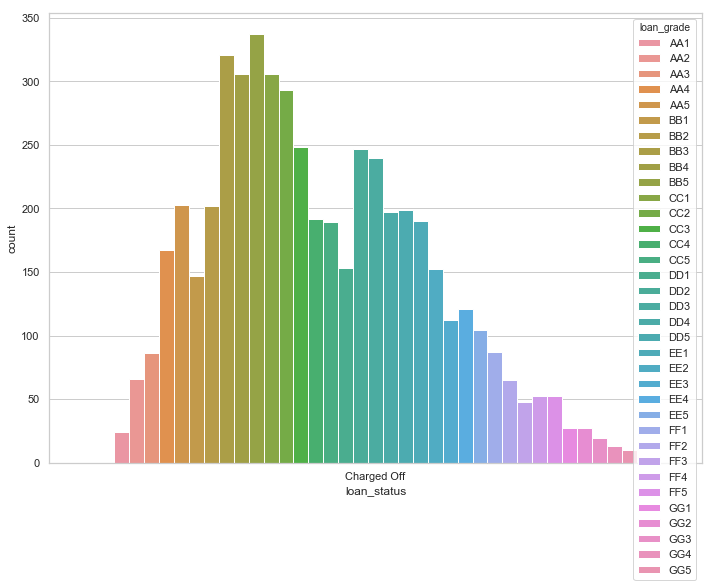

In [8]:
#npa_loans relation with loan_grade/loan_status for NPA loans 
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
df2 = df.groupby(['loan_status','loan_grade']).size().to_frame(name = 'count').reset_index()
ax2 = sns.barplot(x='loan_status', y='count',hue='loan_grade' , data=df2,orient='H')

#### Loan Grade seems to normally dstributed for  NPA Defaults, Maximum loans being defaulted under BB1 TO DD5 Category

#### Checkpoint 3:3 npa_loans relation with grade, sub_grade/loan_status 

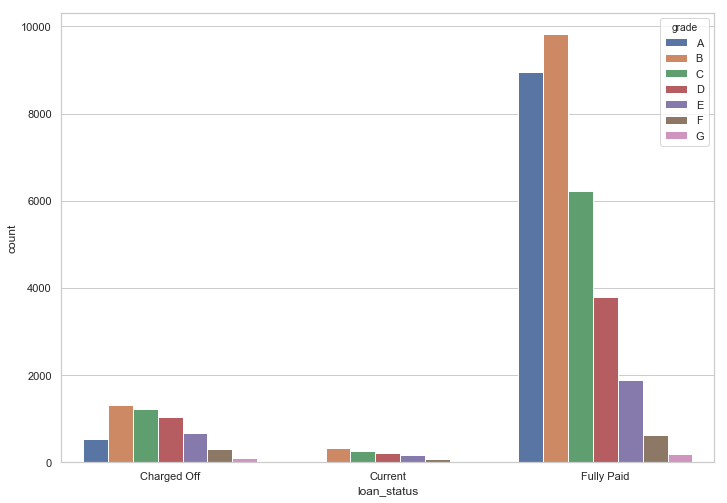

In [9]:
#npa_loans relation with grade/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
df2 = loan.groupby(['loan_status','grade']).size().to_frame(name = 'count').reset_index()
ax2 = sns.barplot(x='loan_status', y='count',hue='grade' , data=df2,orient='H')

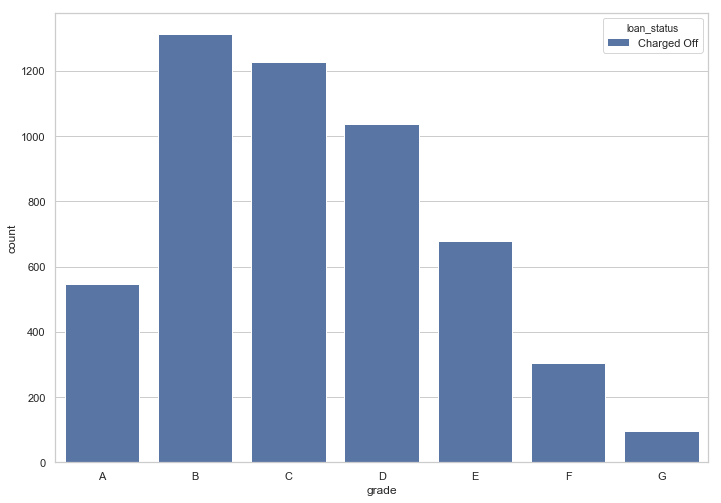

In [10]:
#npa_loans relation with grade/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
df2 = df.groupby(['loan_status','grade']).size().to_frame(name = 'count').reset_index()
ax2 = sns.barplot(x='grade', y='count',hue='loan_status' , data=df2,orient='H')

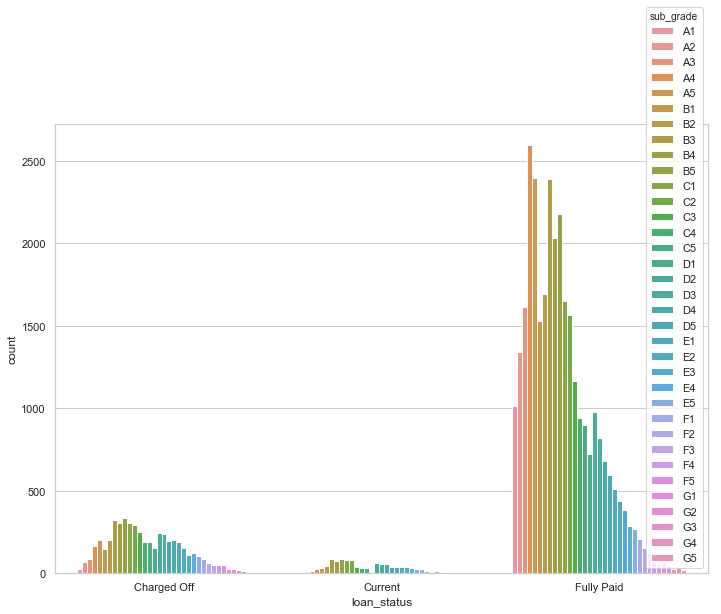

In [11]:
#npa_loans relation with sub_grade/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
df2 = loan.groupby(['loan_status','sub_grade']).size().to_frame(name = 'count').reset_index()
ax3 = sns.barplot(x='loan_status', y='count',hue='sub_grade' , data=df2,orient='H')

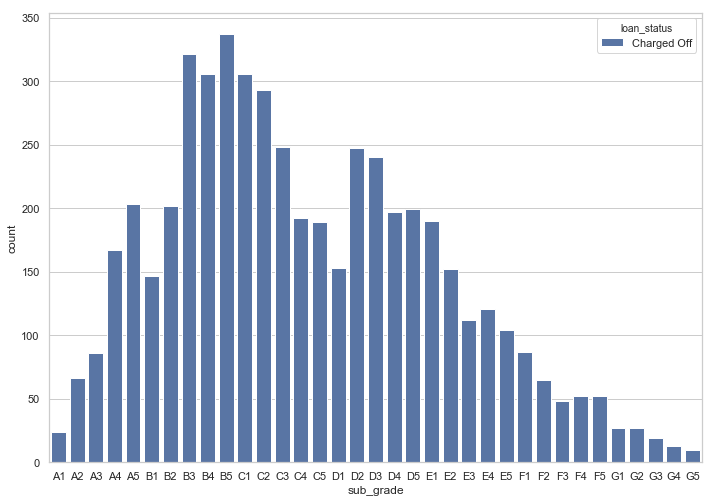

In [12]:
#npa_loans relation with sub_grade/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
df2 = df.groupby(['loan_status','sub_grade']).size().to_frame(name = 'count').reset_index()
ax3 = sns.barplot(x='sub_grade', y='count',hue='loan_status' , data=df2,orient='H')

#### Loan Grade shows small correlation with Loan defaults, maximum default loans NPS faling under Categor Rating B,C,D \n
#### subgrade seems to have minimal impact on the dfault rate , Major group Grade determines NPA's

#### Checkpoint 3:4 npa_loans relation with term/loan_status 

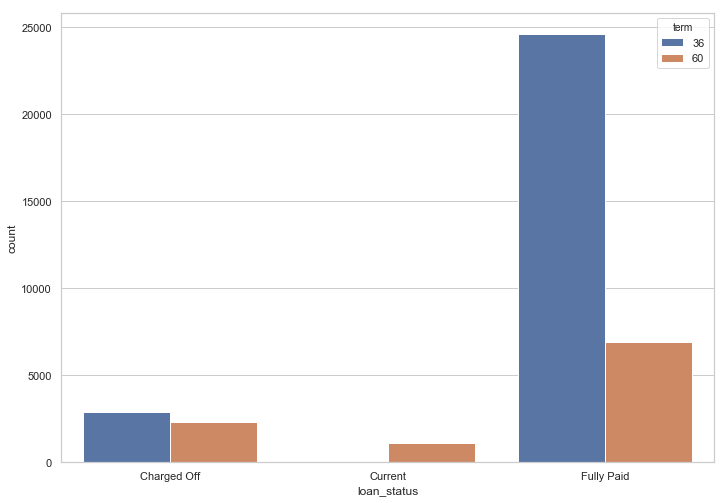

In [13]:
# npa_loans relation with term/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
df2 = loan.groupby(['loan_status','term']).size().to_frame(name = 'count').reset_index()
ax2 = sns.barplot(x='loan_status', y='count',hue='term' , data=df2,orient='H')

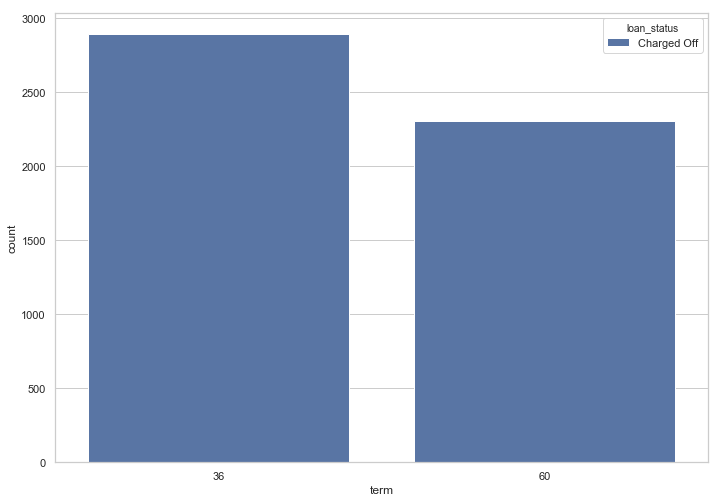

In [14]:
# npa_loans relation with term/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
df2 = df.groupby(['loan_status','term']).size().to_frame(name = 'count').reset_index()
ax2 = sns.barplot(x='term', y='count',hue='loan_status' , data=df2,orient='H')

#### small correlation between term size and NPA , loans of term <=36 months are more likely to fail 

#### Checkpoint 3:5 npa_loans relation with verification status/loan_status 

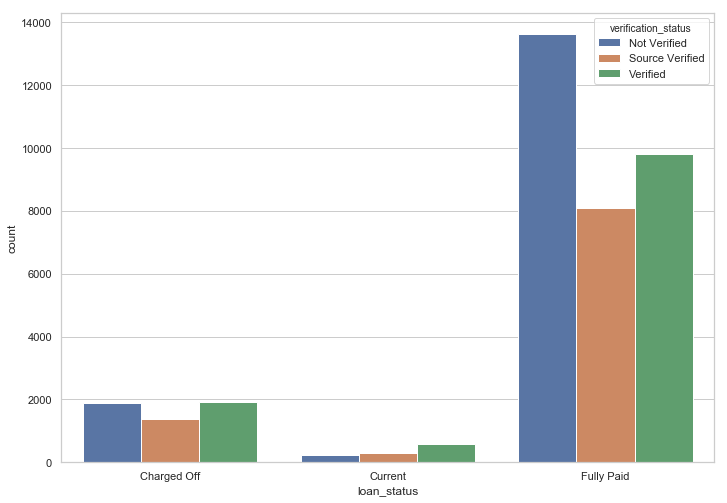

In [15]:
# npa_loans relation with term/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
df2 = loan.groupby(['loan_status','verification_status']).size().to_frame(name = 'count').reset_index()
ax2 = sns.barplot(x='loan_status', y='count',hue='verification_status' , data=df2,orient='H')


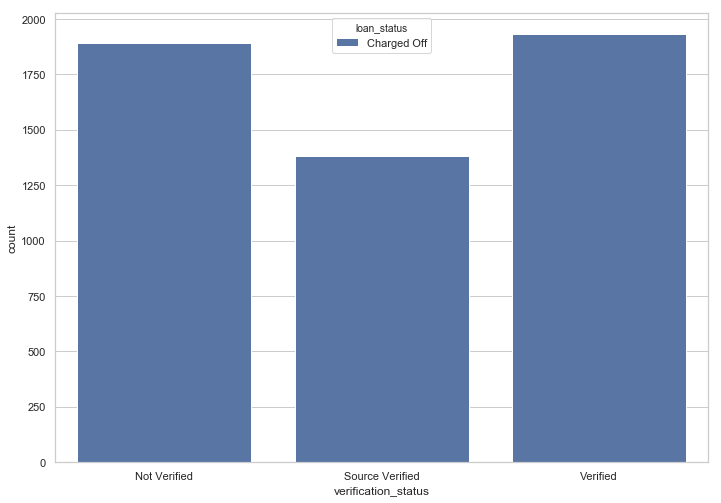

In [16]:
# npa_loans relation with term/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
df2 = df.groupby(['loan_status','verification_status']).size().to_frame(name = 'count').reset_index()
ax2 = sns.barplot(x='verification_status', y='count',hue='loan_status' , data=df2,orient='H')


#The income sources that were verified defaulted the most with "source verified" and "not verified" coming next.
#This is contrary to what one would expect.

#### Checkpoint 3:6 npa_loans relation with emp_length / loan_status 

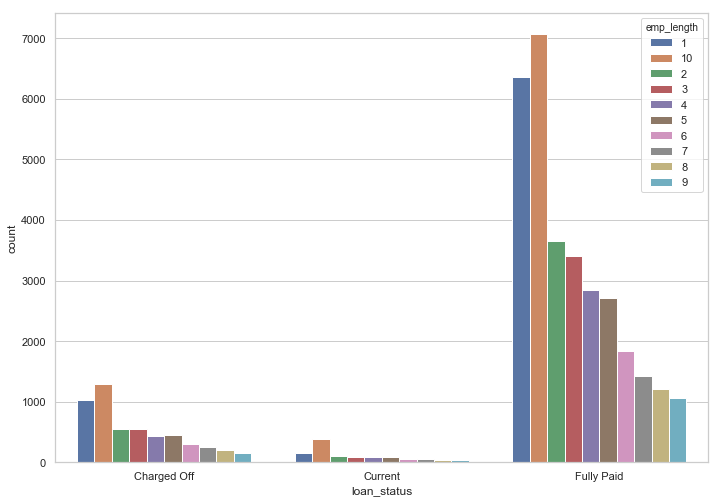

In [17]:
# npa_loans relation with term/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
df2 = loan.groupby(['loan_status','emp_length']).size().to_frame(name = 'count').reset_index()
ax2 = sns.barplot(x='loan_status', y='count',hue='emp_length' , data=df2,orient='H')


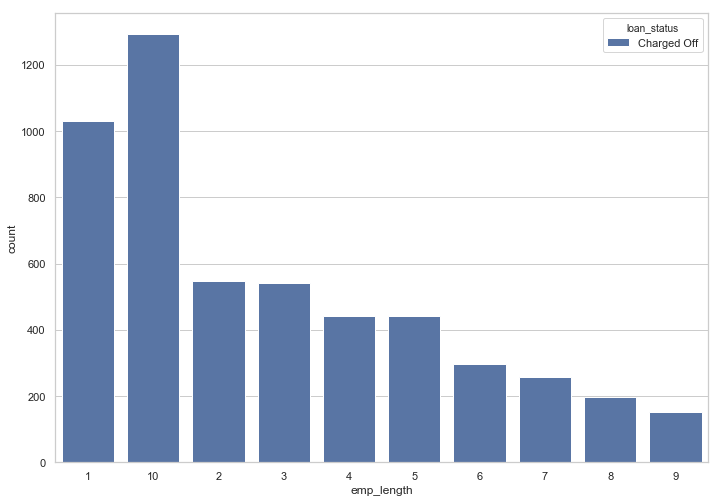

In [18]:
# npa_loans relation with term/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
df2 = df.groupby(['loan_status','emp_length']).size().to_frame(name = 'count').reset_index()
ax2 = sns.barplot(x='emp_length', y='count',hue='loan_status' , data=df2,orient='H')


#### based on above, maximum Defaults ae for period of <=1 and >=10 years, employment length, decresing successievielly from 2-9 years Emp, then shoottig up for 10+ year 

#### Checkpoint 3:7 npa_loans relation with purposeof loan / loan_status 


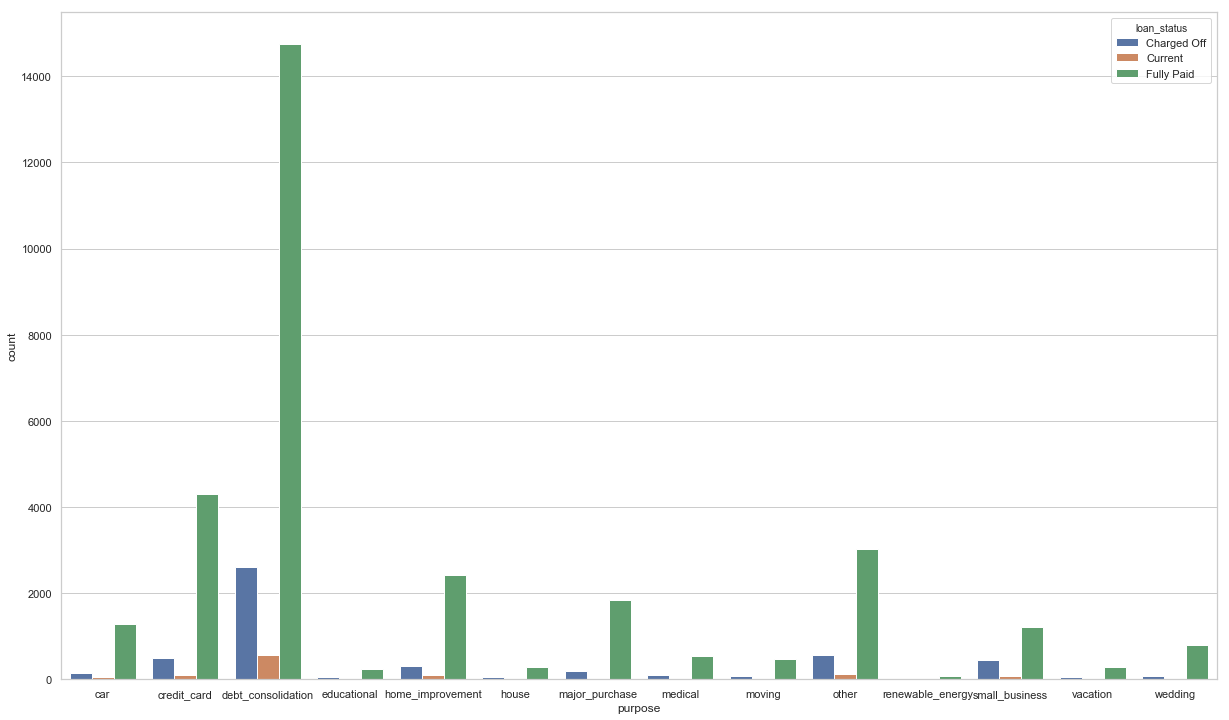

In [19]:
# npa_loans relation with term/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(20.7,12.27)})
sns.set_style("whitegrid")
df2 = loan.groupby(['loan_status','purpose']).size().to_frame(name = 'count').reset_index()
ax2 = sns.barplot(x='purpose', y='count',hue='loan_status' , data=df2,orient='H')

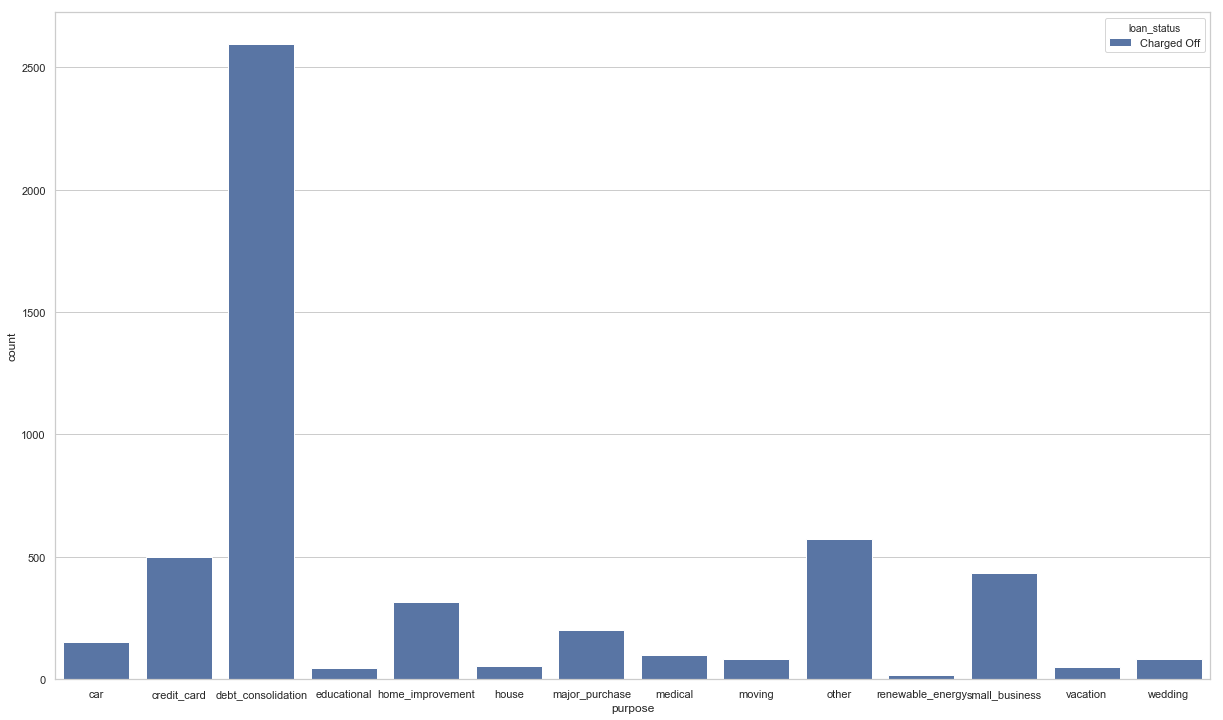

In [20]:
# npa_loans relation with term/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(20.7,12.27)})
sns.set_style("whitegrid")
df2 = df.groupby(['loan_status','purpose']).size().to_frame(name = 'count').reset_index()
ax2 = sns.barplot(x='purpose', y='count',hue='loan_status' , data=df2,orient='H')

#### from above its clear trend is visible, Debt consolidation , others, and Credit card loans are most Fialed loans in books as default 

#### Checkpoint 3:8 npa_loans relation with Income of customer/ loan_status 

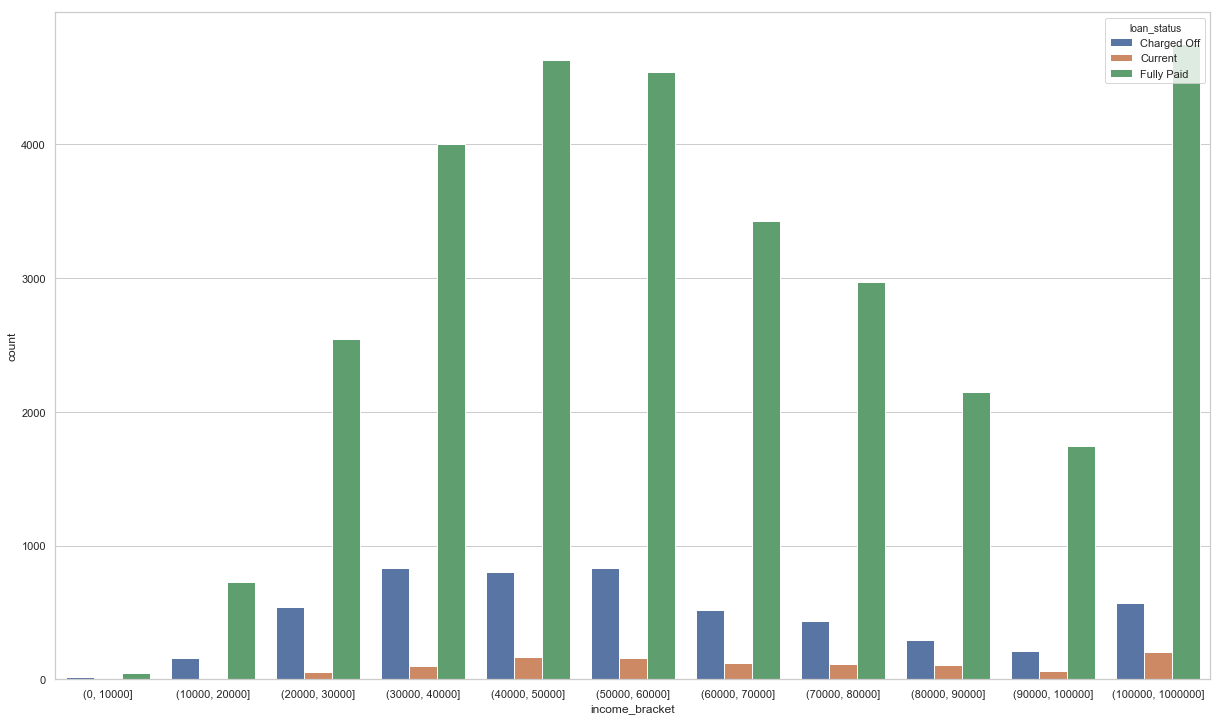

In [21]:
# npa_loans relation with term/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(20.7,12.27)})
sns.set_style("whitegrid")
df2 = loan.groupby(['loan_status','income_bracket']).size().to_frame(name = 'count').reset_index()
ax2 = sns.barplot(x='income_bracket', y='count',hue='loan_status' , data=df2,orient='H')

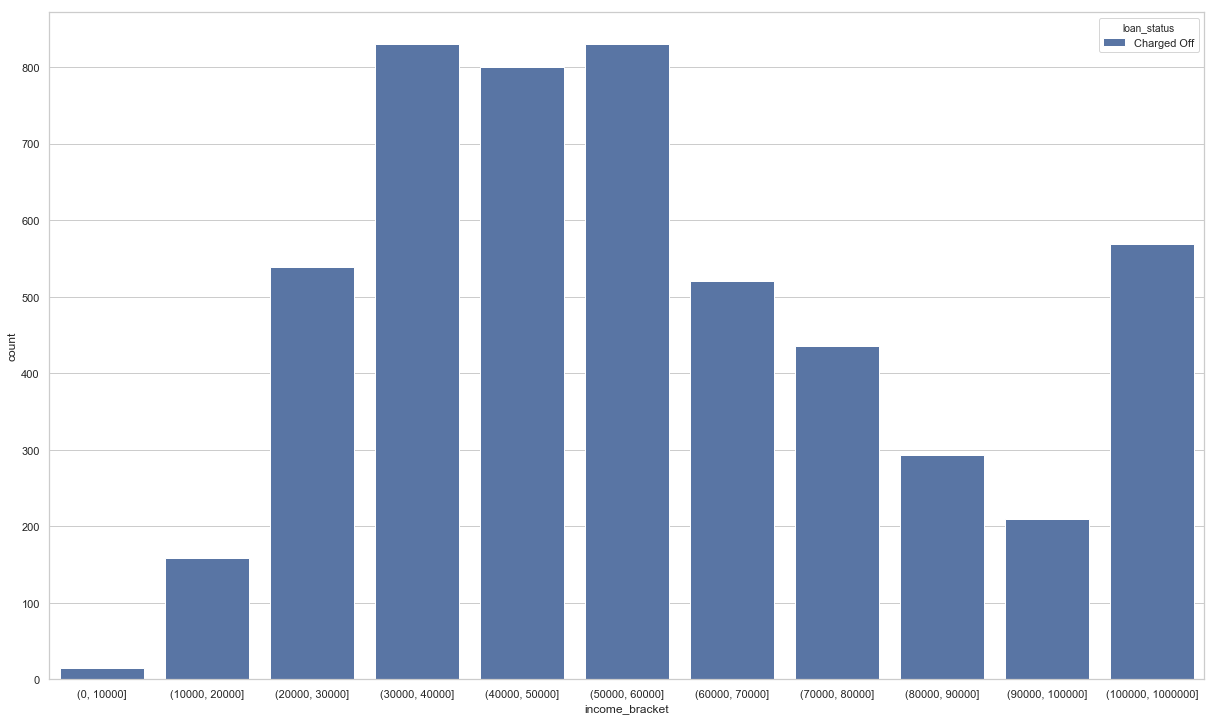

In [22]:
# npa_loans relation with term/loan_status 
%matplotlib inline  
sns.set(rc={'figure.figsize':(20.7,12.27)})
sns.set_style("whitegrid")
df2 = df.groupby(['loan_status','income_bracket']).size().to_frame(name = 'count').reset_index()
ax2 = sns.barplot(x='income_bracket', y='count',hue='loan_status' , data=df2,orient='H')

#### from above data it is clear that maximum defaults come from middle income group, between 30000 to 60000 Income bracket